# Reference
https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents-notebooks/403_RNN_regressor.ipynb

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reproducible
np.random.seed(1)
torch.manual_seed(1)

In [3]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate
episode = 50

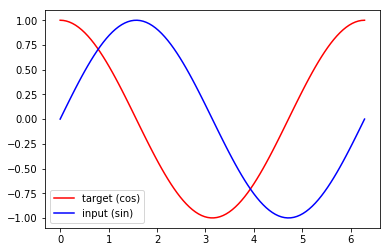

In [4]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [5]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()

        self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)
    
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)       
        r_out = r_out.view(-1, 32)
        outs = self.out(r_out)
        outs = outs.view(-1, TIME_STEP, 1)
        return outs, h_state
    
    def init_hidden(self):
        # Initialize hidden and cell states
        # (num_layers * num_directions, batch, hidden_size)
        return (torch.zeros(1, 1, 32),torch.zeros(1, 1, 32))

In [6]:
rnn = LSTM()

In [7]:
rnn

LSTM(
  (rnn): LSTM(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [8]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.MSELoss()

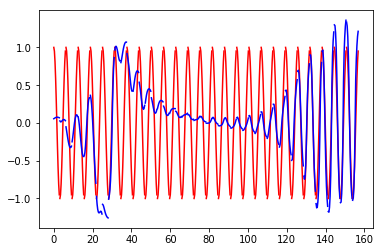

In [9]:
#train
h_state = rnn.init_hidden()
for step in range(episode):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False)  # float32 for converting torch FloatTensor
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    
    prediction, h_state = rnn(x, h_state)   # rnn output

    
    optimizer.zero_grad()                   # clear gradients for this training step
    loss = loss_func(prediction, y)         # calculate loss
    loss.backward(retain_graph=True)                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); 
    plt.pause(0.05)

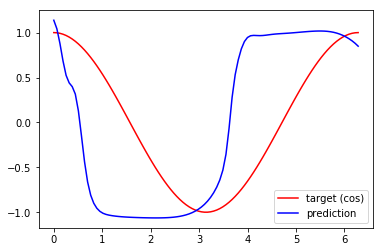

In [10]:
# Test 
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)   
y_np = np.cos(steps)

x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

prediction, h_state = rnn(x, h_state)   # rnn output
    
#plotting
plt.plot(steps, y_np.flatten(), 'r-',label='target (cos)')
plt.plot(steps, prediction.data.numpy().flatten(), 'b-',label='prediction')
plt.legend(loc='best')
plt.draw(); 